# Classification

- Classification is a problem where you put objects/things/ in to different classes based on the features.
- We will learn the classification through example

  - We will use the MNIST data set
        - contains 70,000 small images
        - Images are hand written digits from 0 to 9.

  - Task is to identify the numbers from the information we have about the image

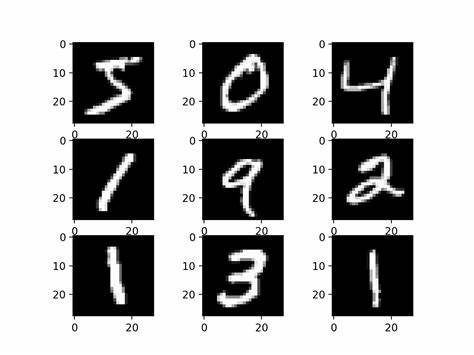

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [5]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()

In [6]:
X.shape

(70000, 784)

- Each row of the "data" is corresponding to single digit.


In [7]:
y.shape

(70000,)

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

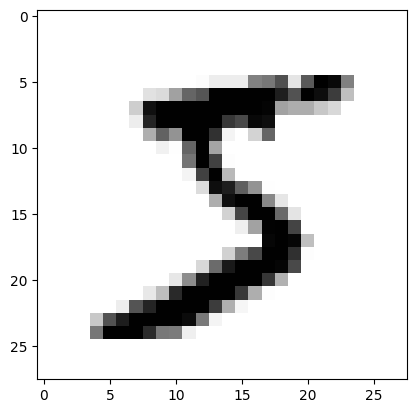

In [10]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation ="nearest")
plt.show()

In [11]:
y[0]

'5'

In [12]:
import numpy as np

y = y.astype(np.uint8)

In [13]:
y[0]

5

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

# Binary Classification
- You only have two classes
- In this example lets say you want to distinguish number 5 from the other numbers.
- So two classes would be "Number 5" and " not number 5"

In [15]:
y_train_5 = (y_train == 5) # True for al 5s and false for other numbers
y_test = (y_test == 5)

- There are different binary classifiers in ML
- We will use the " Stochastic Gradient Desent (SGD)" classifier
         - Can handle large data sets

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([X[3]])

array([False])

In [18]:
y[3]

1

- So ,  we got an ML model in place
- Let's look at how good this is --> by using the performance measures

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

- The accuracy is above 95% and looks very good.

- Let's look at a very dumb classifier

In [20]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X),1), dtype = bool)

In [21]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## Confusion Matrix

In [22]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [24]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [25]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [26]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

# Multiclass Classification

- We can do Multiclass classification using binary classification

## One-Versus-All (OvA) stratergy
   - you build the classes like : 0-detector, 1-detectpr, 2-tectors, ----
   - If there are N classes --> you only have to build N Classifiers
   - In MNIST problem --> 10 classifiers

## One-Versus-One (OvO) stratergy
  - you build the classes to
      - distinguish 0 and 1
      - distinguish 0 and 2
      - distinguish 0 and 3
      -----
      - distinguish 2 and 5
   - If you have N classes --> you have to create Nx(N-1)/2 classifiers
   - MNIST problem --> 10x(10-1)/2 == 45 classifiers

- When you try to use a binary clasifire for multiclass classification, Scikit learn can detect that
   - It will automatically use OvA (except for SVM - use OvO)

In [27]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [28]:
sgd_clf.predict([X[2]])

array([4], dtype=uint8)

In [29]:
some_digit_scores = sgd_clf.decision_function([X[2]])
some_digit_scores

array([[-34143.40703505, -21942.13780869,  -4018.29275037,
         -2239.19313075,     43.09419826, -15058.88052383,
        -33653.31059893,  -8277.80610963,  -7460.52016321,
        -14180.15338984]])

In [30]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Random Forest Classifier
- Multi-class classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [32]:
forest_clf.predict([X[0]])

array([5], dtype=uint8)

In [33]:
forest_clf.predict_proba([X[0]])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [34]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring= "accuracy")

array([0.9646 , 0.96255, 0.9666 ])

In [35]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv =3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5840,    1,    8,    2,    4,    9,   20,    1,   35,    3],
       [   1, 6635,   43,   11,   13,    5,    6,   13,   12,    3],
       [  27,   12, 5749,   30,   32,    4,   20,   37,   41,    6],
       [   7,    7,   91, 5811,    3,   63,    7,   49,   61,   32],
       [  12,   13,   14,    1, 5645,    0,   28,   14,   17,   98],
       [  20,    9,    9,   64,   12, 5198,   53,    6,   31,   19],
       [  26,   11,    5,    0,   12,   46, 5803,    0,   15,    0],
       [   4,   24,   58,    6,   37,    1,    0, 6037,   11,   87],
       [   9,   35,   44,   52,   26,   52,   27,    5, 5525,   76],
       [  21,   10,   14,   76,   75,   15,    3,   58,   45, 5632]])

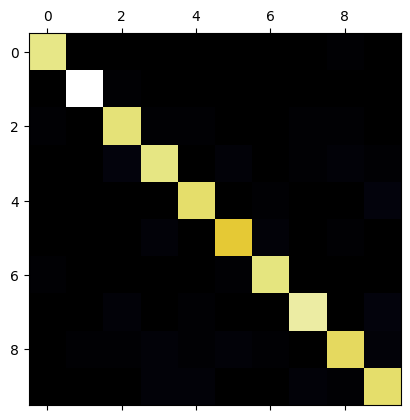

In [36]:
plt.matshow(conf_mx, cmap = plt.cm.CMRmap)
plt.show()

- Instead of directly comparing errors, we will compare the error rate
- devide each entry in the conf. mx by the number of images in the corresponding class

In [37]:
row_sum = conf_mx.sum(axis = 1, keepdims=True)
norm_conf_mx = conf_mx/ row_sum

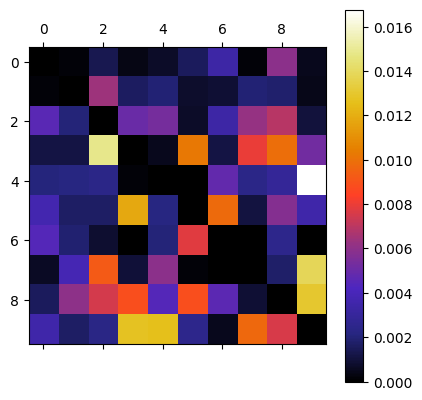

In [38]:
np.fill_diagonal(norm_conf_mx, 0)   # fill the diagonal by 0 so that the other entries will appear clear
plt.matshow(norm_conf_mx, cmap = plt.cm.CMRmap)
plt.colorbar()
plt.show()
